# 3. Transformaciones de intensidad y filtrado espacial 

El término *dominio espacial* se refiere al plano de la imagen en sí, y los métodos de procesamiento de imágenes de esta categoría se basan en la manipulación directa de los píxeles de una imagen. 

Esto contrasta con el procesamiento de imágenes en un dominio de transformación que implica primero transformar una imagen en el dominio de transformación, realizar el procesamiento allí y obtener la transformación inversa para devolver los resultados en el dominio espacial. 

Dos categorías principales de procesamiento espacial son las transformaciones de intensidad y el filtrado espacial. 

* Las transformaciones de intensidad operan en píxeles individuales de una imagen para tareas como manipulación de contraste y umbralización de imágenes. 

* El filtrado espacial realiza operaciones en la vecindad de cada píxel de una imagen. Ejemplos de filtrado espacial incluyen el suavizado y la nitidez de imágenes. 

## 3.1. Contexto

* Todas las técnicas de procesamiento de imágenes que veremos en esta unidad se implementan en el dominio espacial, que es el plano que contiene los píxeles de una imagen. 
* Las técnicas de dominio espacial operan directamente sobre los píxeles de una imagen

* Como verá, algunas tareas de procesamiento de imágenes son más fáciles o más significativas de implementar en el dominio espacial, mientras que otras son más adecuadas para otros enfoques.

### Fundamentos de las transformaciones de intensidad y el filtrado especial

Los procesos de dominio espacial que analizamos se basan en la expresión

$$
g(x,y) = T \left[ f(x,y)\right]
$$

donde $f (x, y)$ es una imagen de entrada, $g(x, y)$ es la imagen de salida y $T$ es un operador en $f$ definido sobre una vecindad del punto $(x, y)$. 

El operador se puede aplicar a los píxeles de una sola imagen o a los píxeles de un conjunto de imágenes, como realizar la suma por elementos de una secuencia de imágenes para reducir el ruido. 

La figura muestra la implementación básica de la ecuación. 

* El punto $(x_0, y_0)$ que se muestra es una ubicación arbitraria en la imagen y la pequeña región que se muestra es una vecindad de $(x_0, y_0)$. Normalmente, la vecindad es rectangular, centrada en $(x_0, y_0)$ y de tamaño mucho más pequeño que la imagen.

* El proceso consiste en mover el centro de la vecindad de un píxel a otro y aplicar el operador $T$ a los píxeles de la vecindad para obtener un valor de salida en esa ubicación. Por lo tanto, para cualquier ubicación específica $(x_0, y_0)$, el valor de la imagen de salida $g$ en esas coordenadas es igual al resultado de aplicar $T$ a la vecindad con origen en $(x_0, y_0)$ en $f$. 



<img height=600 src='figs/filtro1.png'>

Por ejemplo, supongamos que la vecindad es un cuadrado de tamaño $3 \times 3$ y que el operador $T$ se define como “calcular la intensidad promedio de los píxeles en la vecindad”. 

Considere una ubicación arbitraria en una imagen, digamos $(100,150)$. El resultado en esa ubicación en la imagen de salida, $g(100, 150)$, es la suma de $f (100, 150)$ y sus 8 vecinos, dividida por $9$. 

Luego, el centro de la vecindad se mueve a la siguiente ubicación adyacente. y el procedimiento se repite para generar el siguiente valor de la imagen de salida $g$.

Normalmente, el proceso comienza en la parte superior izquierda de la imagen de entrada y avanza píxel a píxel en un escaneo horizontal (vertical), una fila (columna) a la vez. 

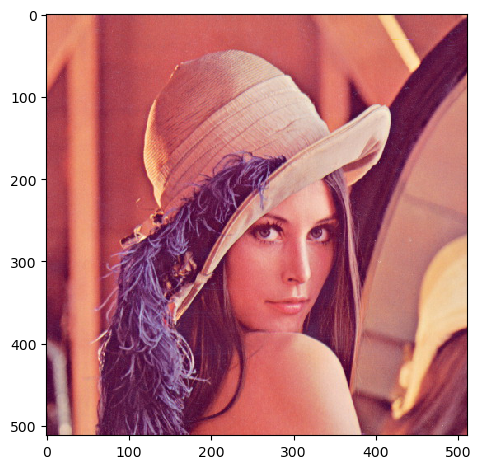

In [1]:
from skimage.io import imread, imshow

lena = imread('figs/lena.jpg')
imshow(lena)

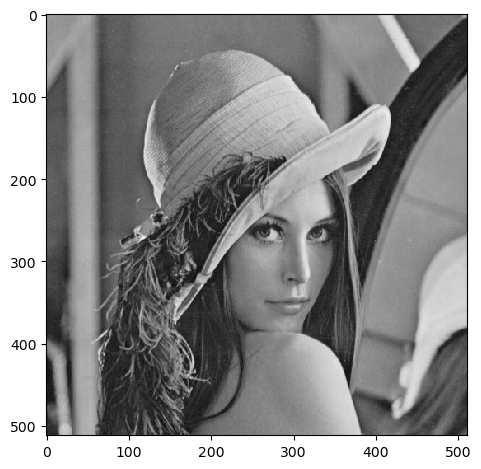

In [2]:
lena_gris = imread('figs/lena.jpg', as_gray=True)
imshow(lena_gris)

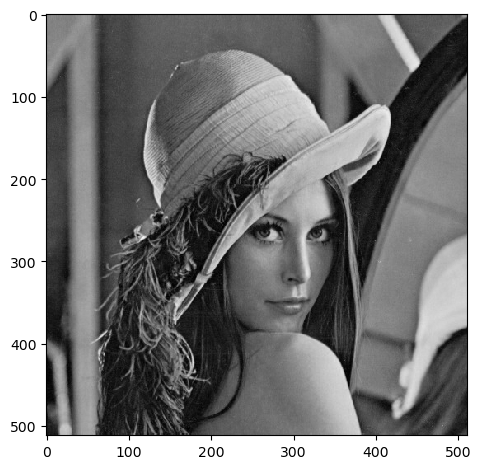

In [3]:
lena_gris = lena[:,:,1]
imshow(lena_gris)

In [31]:
import matplotlib.pyplot as plt

def show_images(*images, titles=[], cols=2, cmap='gray', figsize=(10, 10)):
    """
    Display a list of images in a grid.
    Args:
        images (list): A list of images to display.
        titles (list): A list of titles for each image (optional).
        cols (int): The number of columns in the grid (default=2).
        cmap (str): The colormap to use (default='gray').
        figsize (tuple): The size of the figure (default=(10, 10)).
    """
    rows = len(images) // cols + (1 if len(images) % cols else 0)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i], cmap=cmap)
            if titles is not None:
                ax.set_title(titles[i] if len(titles) > i else 'Figura {}'.format(i+1))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [32]:
# @hidden_cell

import numpy as np

def aplicar_convolucion(image, kernel):
    """
    Aplica una convolución a una imagen usando un kernel.
    
    Parametros:
    image (numpy.ndarray): La imagen a convolucionar.
    kernel (numpy.ndarray): El kernel a usar.
    
    Regresa:
    numpy.ndarray: La imagen convolucionada.
    """
    # Obtenemos las dimensiones de la imagen y el kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculamos el padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Creamos una imagen con padding
    padded_image = np.zeros((image_height + pad_height * 2, image_width + pad_width * 2))
    padded_image[pad_height:-pad_height, pad_width:-pad_width] = image
    
    # Creamos una imagen de salida vacía
    output_image = np.zeros_like(image)
    
    # Apply the convolution
    for y in range(pad_height, image_height + pad_height):
        for x in range(pad_width, image_width + pad_width):
            output_image[y - pad_height, x - pad_width] = np.sum(kernel * padded_image[y - pad_height:y + pad_height + 1, x - pad_width:x + pad_width + 1])
    
    return output_image


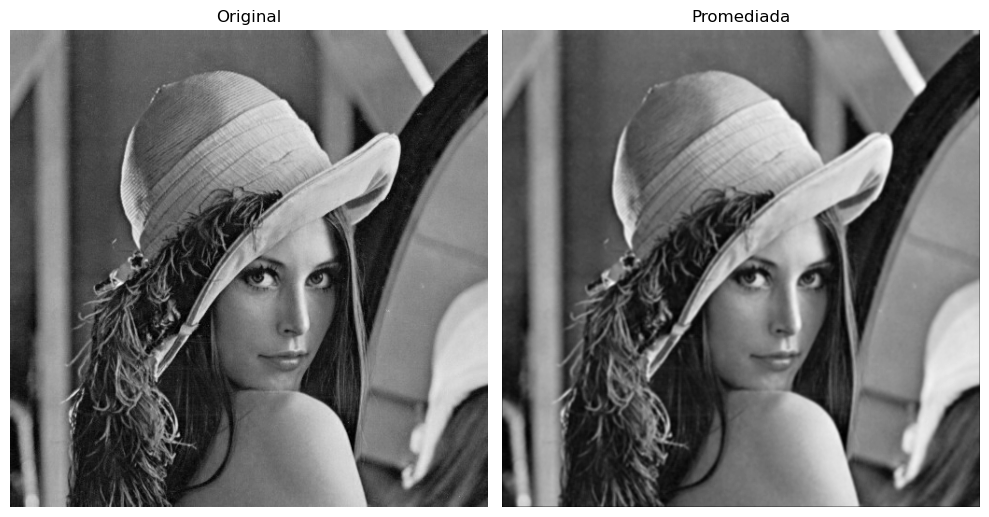

In [33]:
tam_filtro = 3
filtro_promediador = np.ones((tam_filtro, tam_filtro )) / tam_filtro**2

lena_promediada = aplicar_convolucion(lena_gris, filtro_promediador)

show_images(lena_gris, lena_promediada, titles=['Original', 'Promediada'])

## 3.2. Algunas funciones básicas de transformación de intensidad


Las transformaciones de intensidad se encuentran entre las técnicas de procesamiento de imágenes más simples. 

Denotaremos los valores de los píxeles, antes y después del procesamiento, por $r$ y $s$, respectivamente. Estos valores están relacionados mediante una transformación $T$, que asigna un valor de píxel $r$ a un valor de píxel $s$. 

Como introducción a las transformaciones de intensidad, considere la siguiente figura, que muestra tres tipos básicos de funciones utilizadas con frecuencia en el procesamiento de imágenes: 

* lineal (transformaciones negativas y de identidad), 
* logarítmica (transformaciones logarítmicas y logarítmicas inversas) y 
* ley de potencias (transformaciones enésimas y transformaciones de raíz enésima). 
* la función de identidad es el caso trivial en el que las intensidades de entrada y salida son idénticas.

<img height=600 src='figs/int_transforms1.png'>

### Imágenes negativas

El negativo de una imagen con niveles de intensidad en el rango $[0, L − 1]$ se obtiene utilizando la función de transformación negativa que se muestra en la anterior, que tiene la forma:

$$
s = (L-1) - r
$$

Invertir los niveles de intensidad de una imagen digital de esta manera produce el equivalente a un negativo fotográfico. 

Este tipo de procesamiento se utiliza, por ejemplo, para mejorar los detalles blancos o grises incrustados en las regiones oscuras de una imagen, especialmente cuando las áreas negras son dominantes en tamaño. 

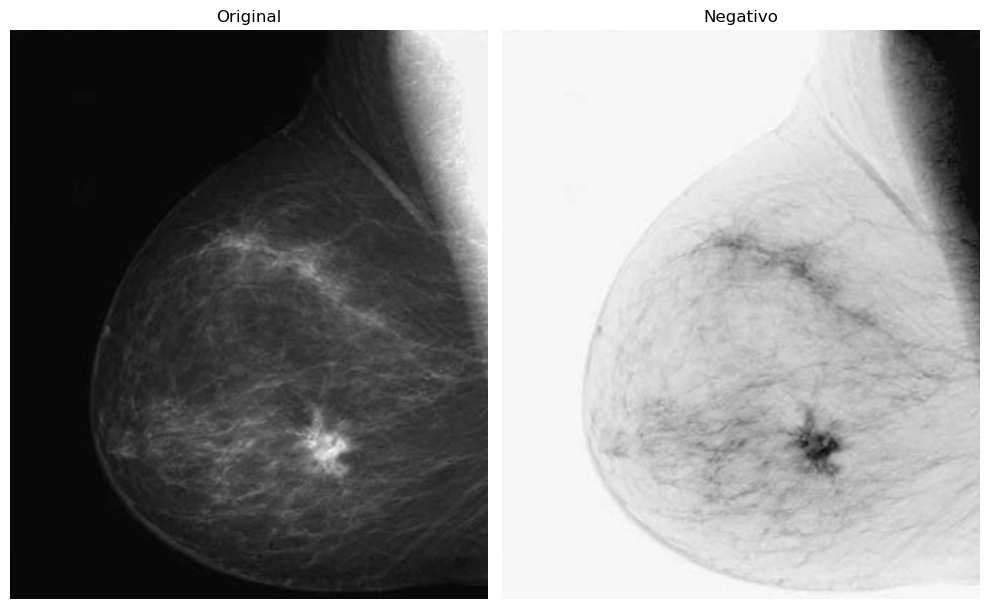

In [47]:
mast = imread('figs/mastografia1.png', as_gray=True)
max = np.max(mast)
mast_neg = max - mast

show_images(mast, mast_neg, titles=['Original', 'Negativo'])


### Transformaciones logarítmicas

La forma general de la transformación logarítmica es:

$$
s = c \log (1+r)
$$

donde $c$ es una constante y se supone que $r \geq 0$. La forma de la curva logarítmica muestra que esta transformación transforma un rango estrecho de valores de baja intensidad en la entrada en un rango más amplio de niveles de salida. 

Por ejemplo, observe cómo los niveles de entrada en el rango $[0, L/4]$ se asignan a los niveles de salida en el rango $[0, 3L/4]$. 

Por el contrario, los valores más altos de los niveles de entrada se asignan a un rango más estrecho en la salida. 

Usamos una transformación de este tipo para expandir los valores de los píxeles oscuros en una imagen, mientras comprimimos los valores de nivel superior. 

Lo contrario ocurre con la transformación logarítmica inversa (exponencial).

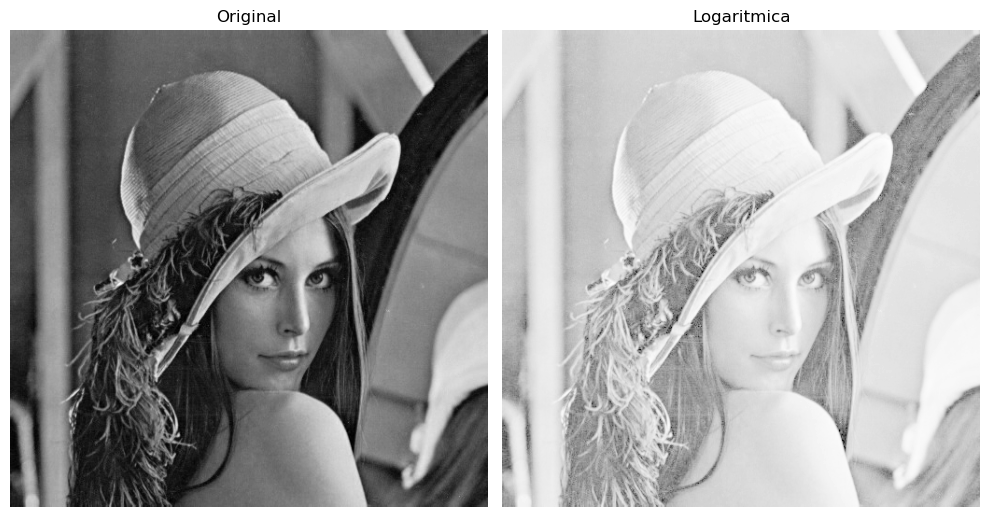

In [50]:
lena_log = np.log(1 + lena_gris)
show_images(lena_gris, lena_log, titles=['Original', 'Logaritmica'])

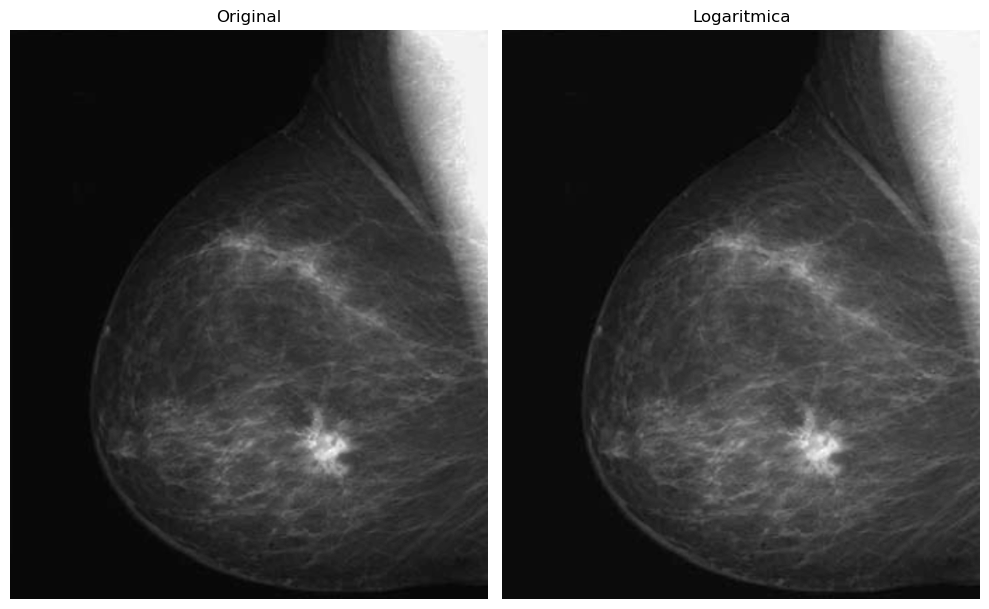

In [51]:
mast_log = np.log(1 + mast)
show_images(mast, mast_log, titles=['Original', 'Logaritmica'])

## 3.3. Procesamiento de histogramas

## 3.4. Fundamentos del filtrado espacial

## 3.5. Filtros espaciales de suavizado (pasa bajo)

## 3.6. Filtros espaciales de nitidez (pasa alto)

## 3.7. Filtros de pasa alto, rechazo de banda y pasa de banda a partir de filtros de pasa bajo

## 3.8. Combinación de métodos de mejora espacial